## Objective Of This Porject



The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation.


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
pd.set_option("display.max_columns", None)

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier




from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV

from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

## Read Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/adult-income-dataset


In [3]:
df = pd.read_csv(path + "/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Exploratory Data Analysis

### Univariate Analysis

<ipython-input-6-7b693def395f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_counts.index, y=income_counts.values,palette='bright')


Text(0, 0.5, 'Count')

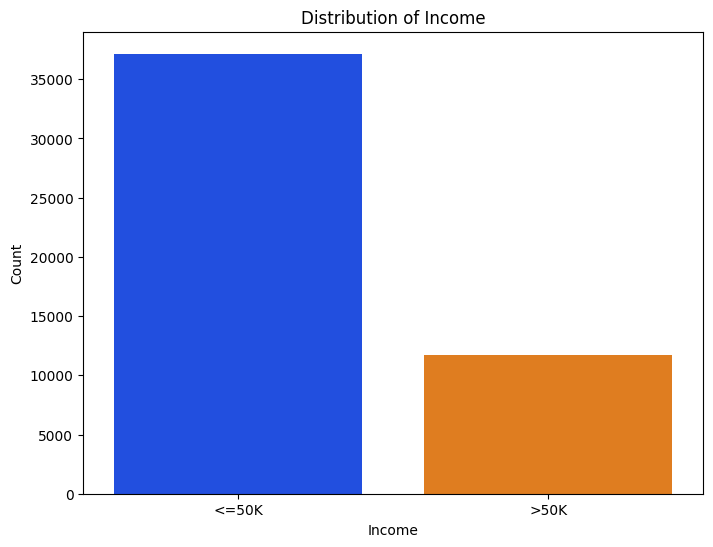

In [6]:
# Creating a barplot for 'Income'
income_counts = df['income'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=income_counts.index, y=income_counts.values,palette='bright')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')

<ipython-input-7-0fcef5aa93da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_counts.index, y=income_counts.values,palette='bright')


Text(0, 0.5, 'Count')

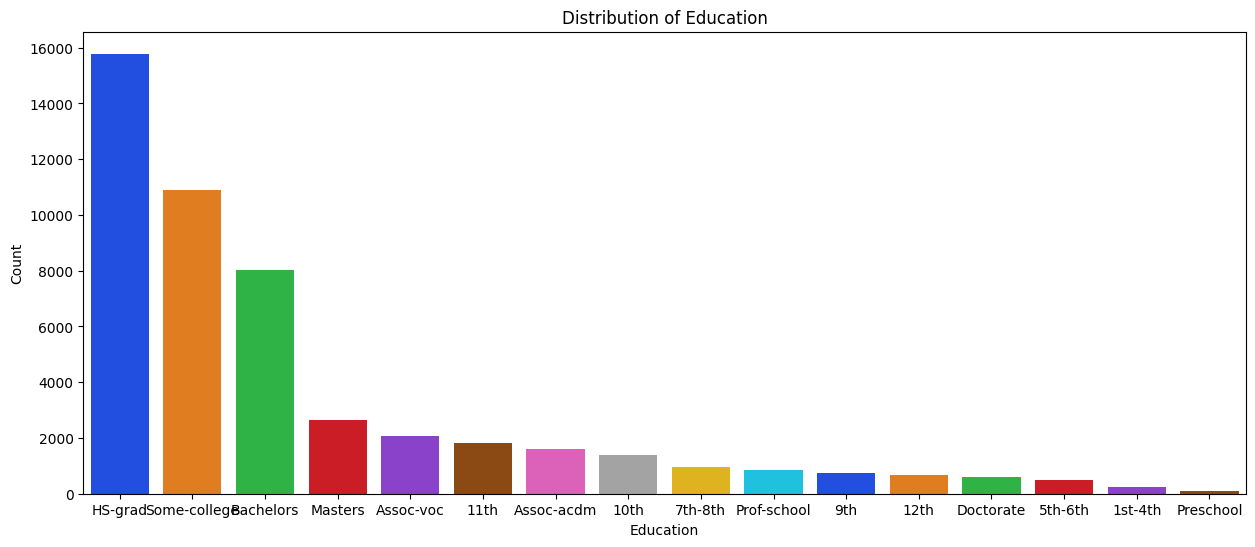

In [7]:
# Creating a barplot for 'education'
income_counts = df['education'].value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=income_counts.index, y=income_counts.values,palette='bright')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')

<ipython-input-8-e5bc08bc7535>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_counts.index, y=income_counts.values,palette='bright')


Text(0, 0.5, 'Count')

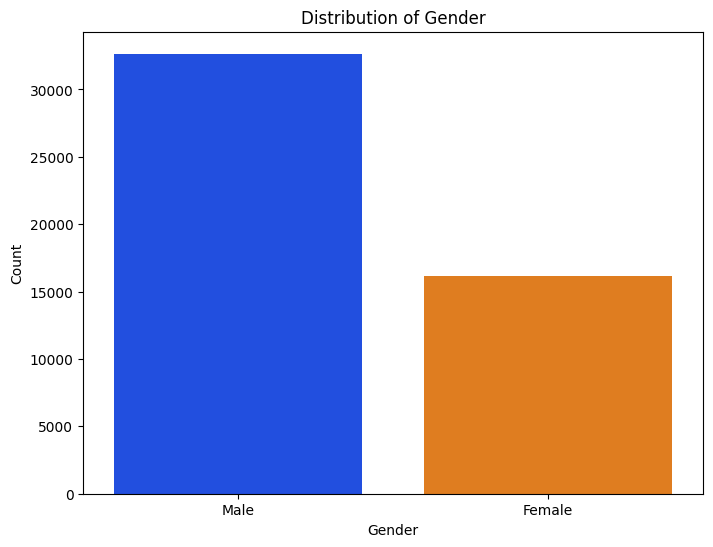

In [8]:
# Creating a barplot for 'Sex'
income_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=income_counts.index, y=income_counts.values,palette='bright')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


<ipython-input-9-ecf3b7198e6b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_counts.index, y=income_counts.values,palette='bright')


Text(0, 0.5, 'Count')

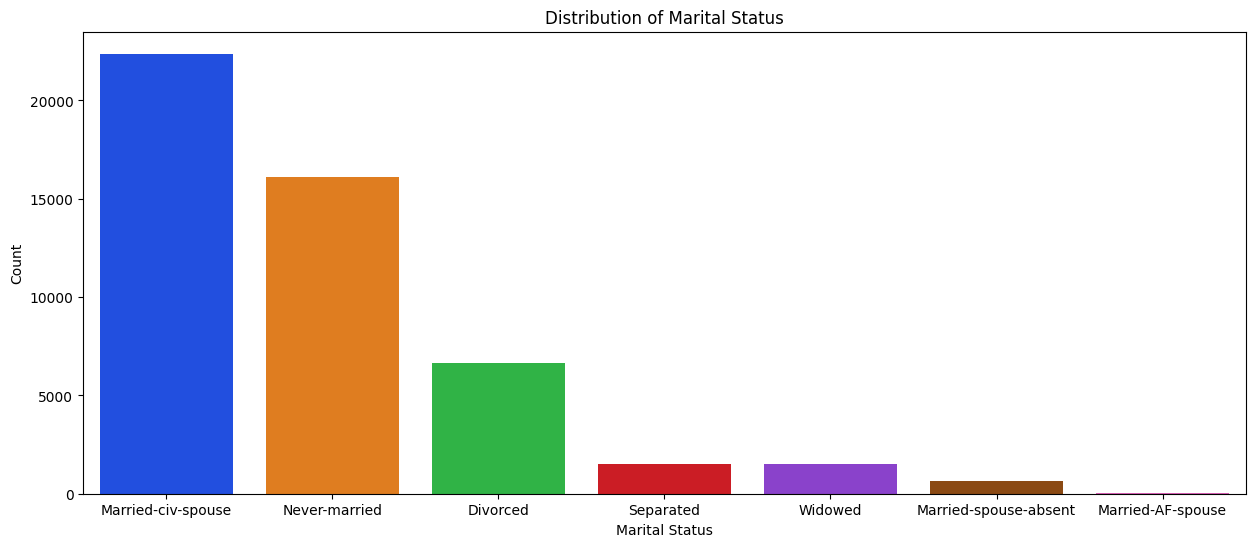

In [9]:
# Creating a barplot for 'Years of Education'
income_counts = df['marital-status'].value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=income_counts.index, y=income_counts.values,palette='bright')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

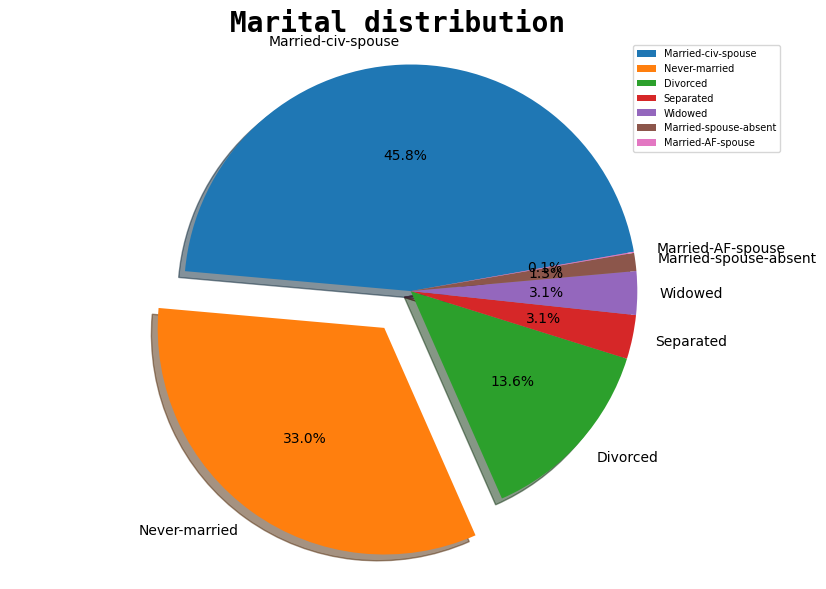

In [10]:
# Creating a pie chart for 'Marital status'
marital = df['marital-status'].value_counts()
plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()


<ipython-input-11-4c98e47c1c2a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_counts.index, y=income_counts.values,palette='bright')


Text(0, 0.5, 'Count')

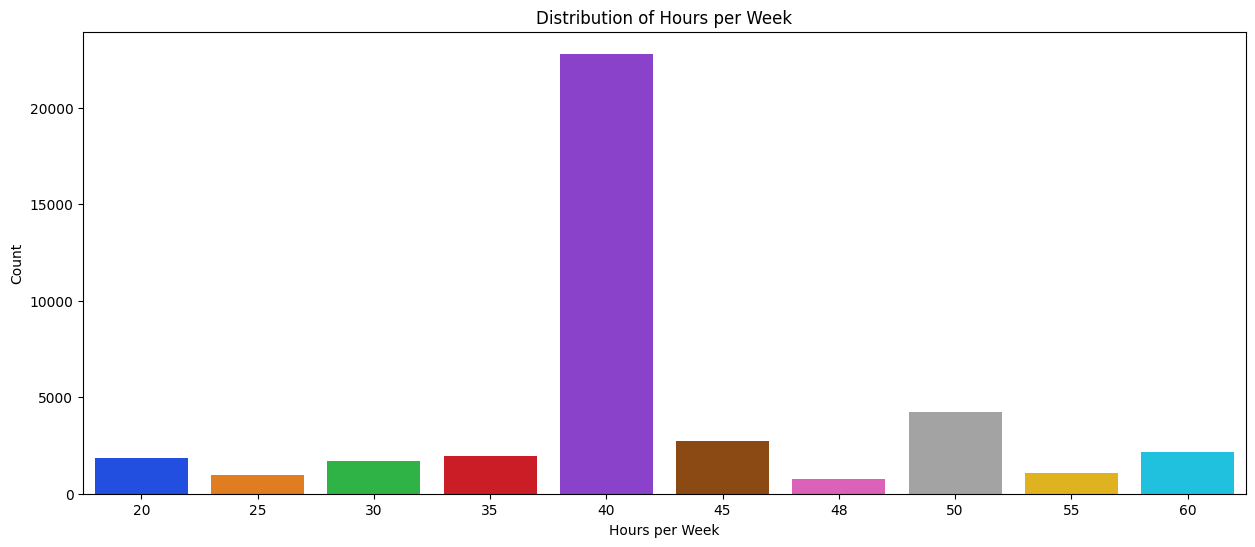

In [11]:
# Creating a barplot for 'Hours per week'
income_counts = df['hours-per-week'].value_counts().head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=income_counts.index, y=income_counts.values,palette='bright')
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Count')


### Bivariate Analysis

Text(0, 0.5, 'Count')

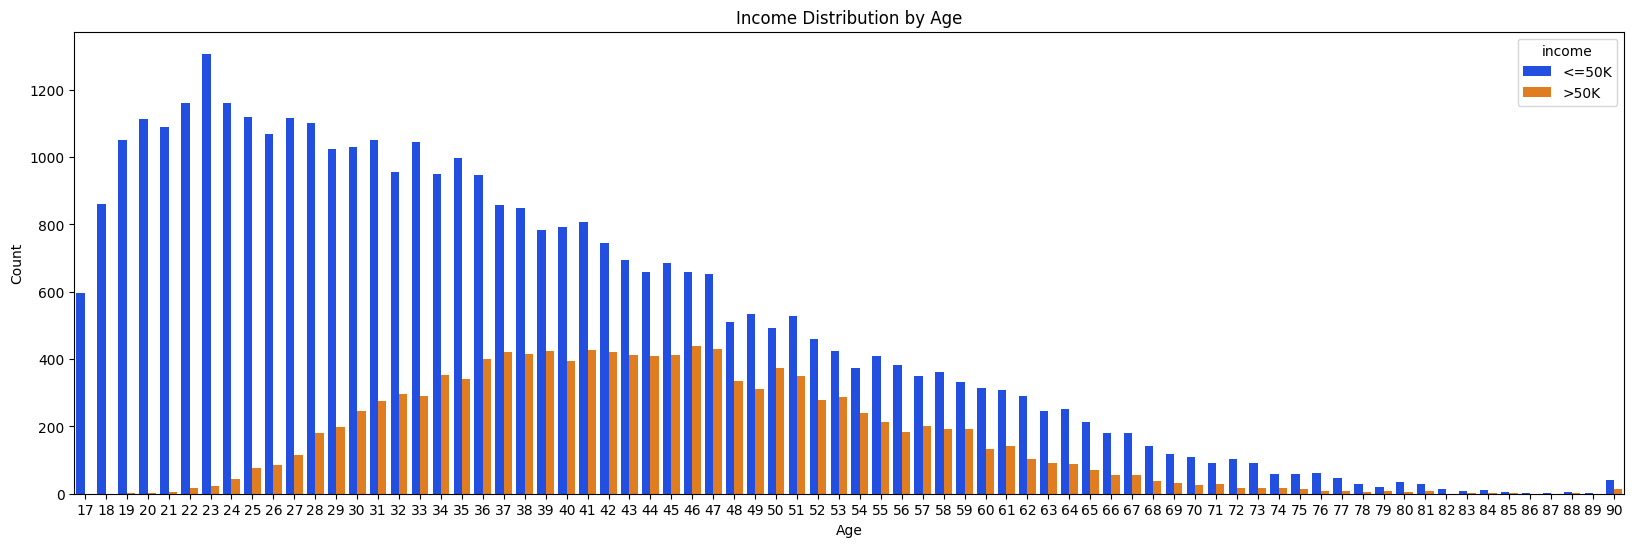

In [12]:
# Creating a countplot of income across age
plt.figure(figsize=(20, 6))
sns.countplot(x='age', hue='income', data=df, palette='bright')
plt.title('Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

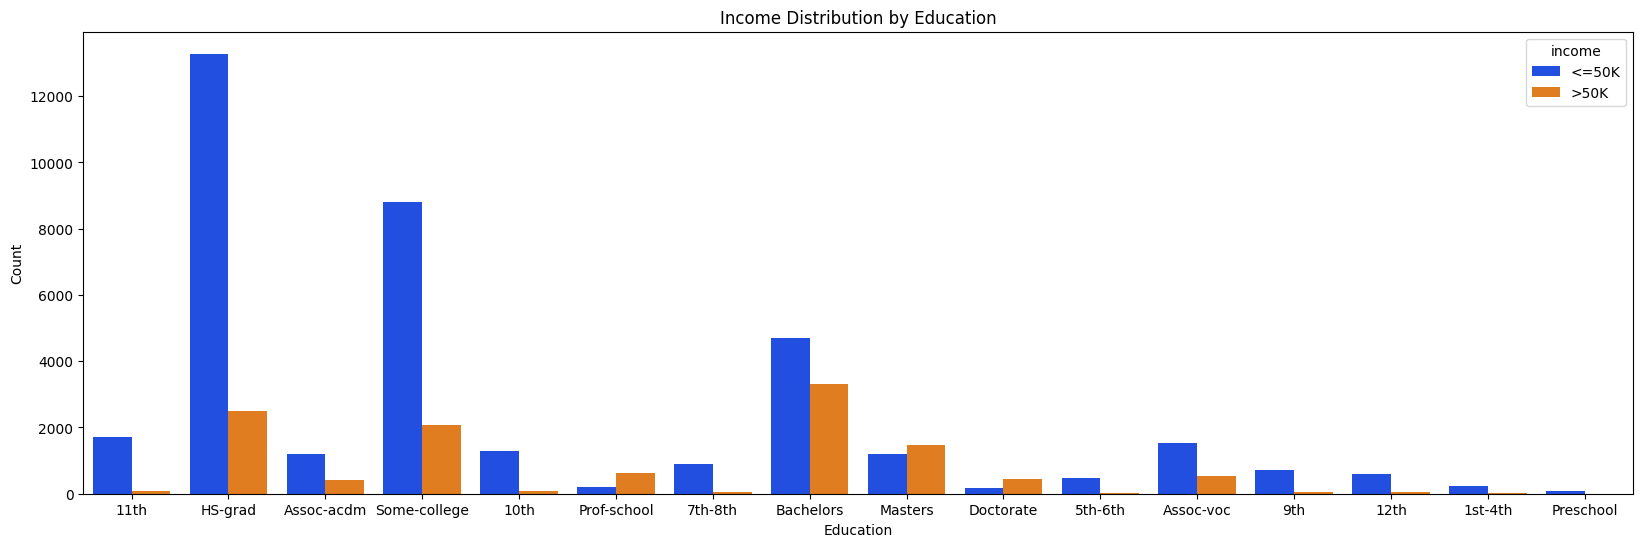

In [13]:
# Creating a countplot of income across education
plt.figure(figsize=(20, 6))
sns.countplot(x='education', hue='income', data=df, palette='bright')
plt.title('Income Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Count')

Text(0.5, 0, 'Years of Education')

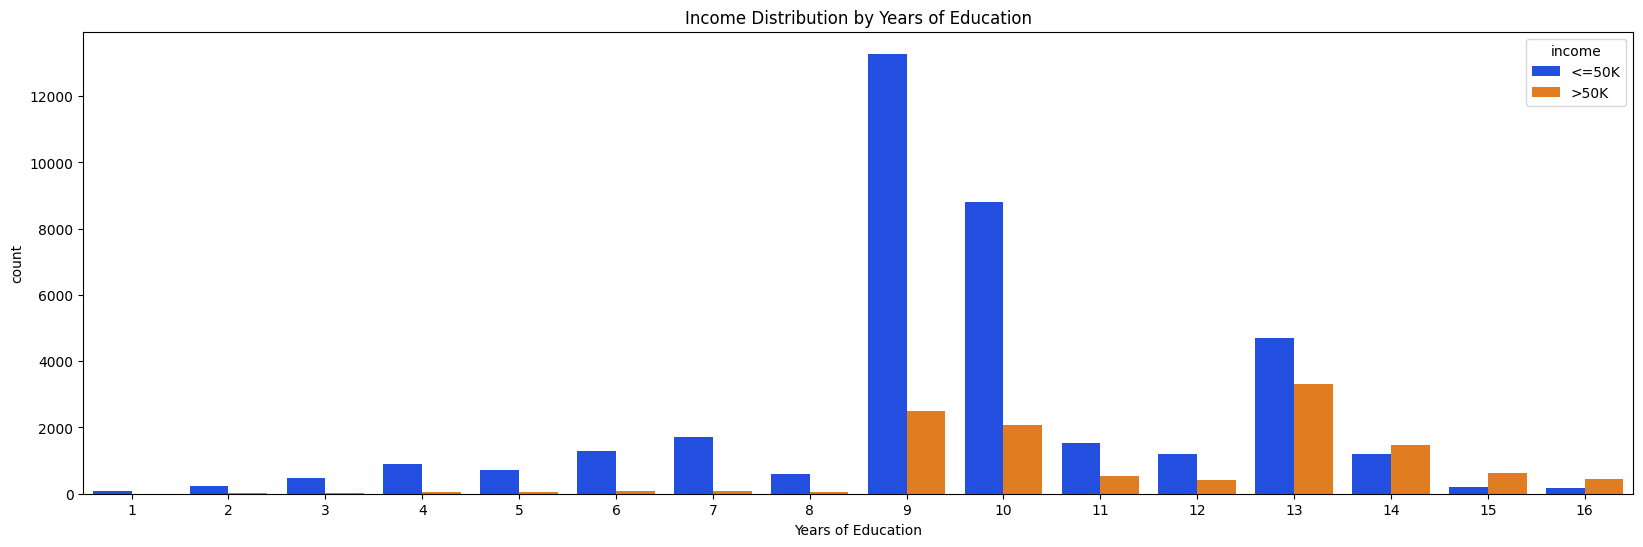

In [14]:
# Creating a countplot of income across years of education
plt.figure(figsize=(20, 6))
sns.countplot(x='educational-num', hue='income', data=df, palette='bright')
plt.title('Income Distribution by Years of Education')
plt.xlabel('Years of Education')


Text(0, 0.5, 'Count')

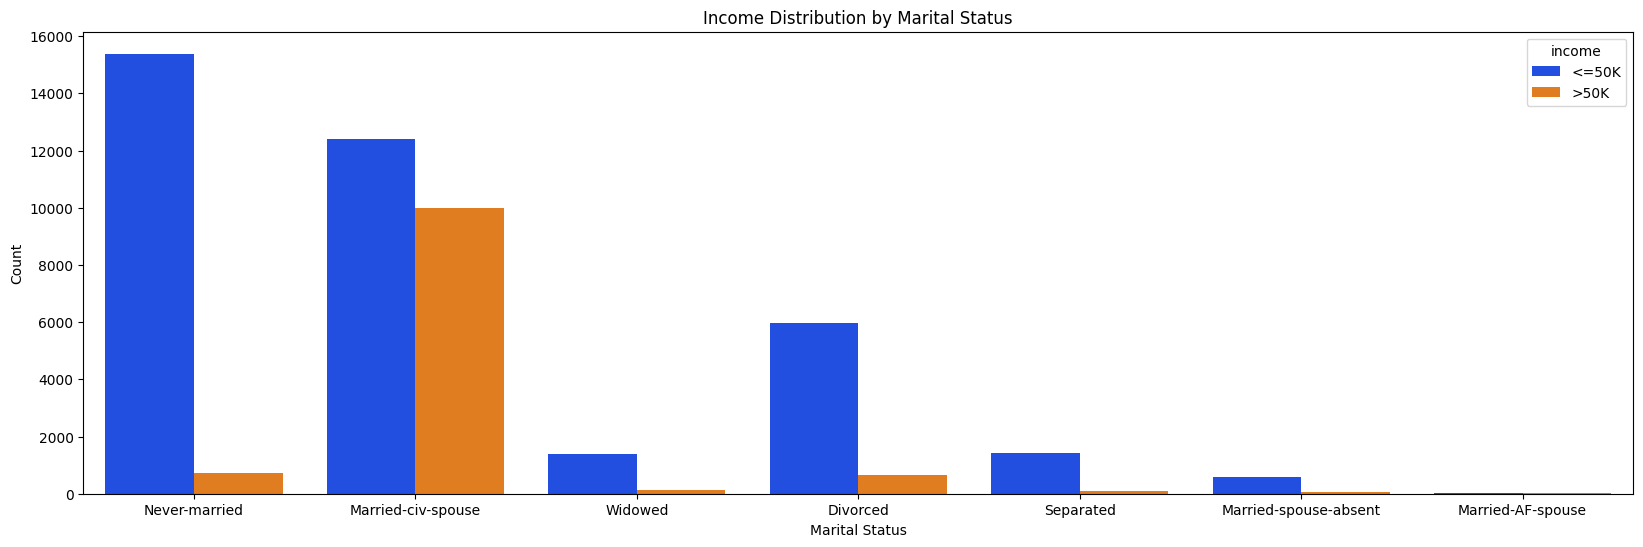

In [15]:
# Creating a countplot of income across Marital Status
plt.figure(figsize=(20, 6))
sns.countplot(x='marital-status', hue='income', data=df, palette='bright')
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')


married people earn more than 50 K where as counts o unmarried are higher in earning less than 50K

Text(0, 0.5, 'Count')

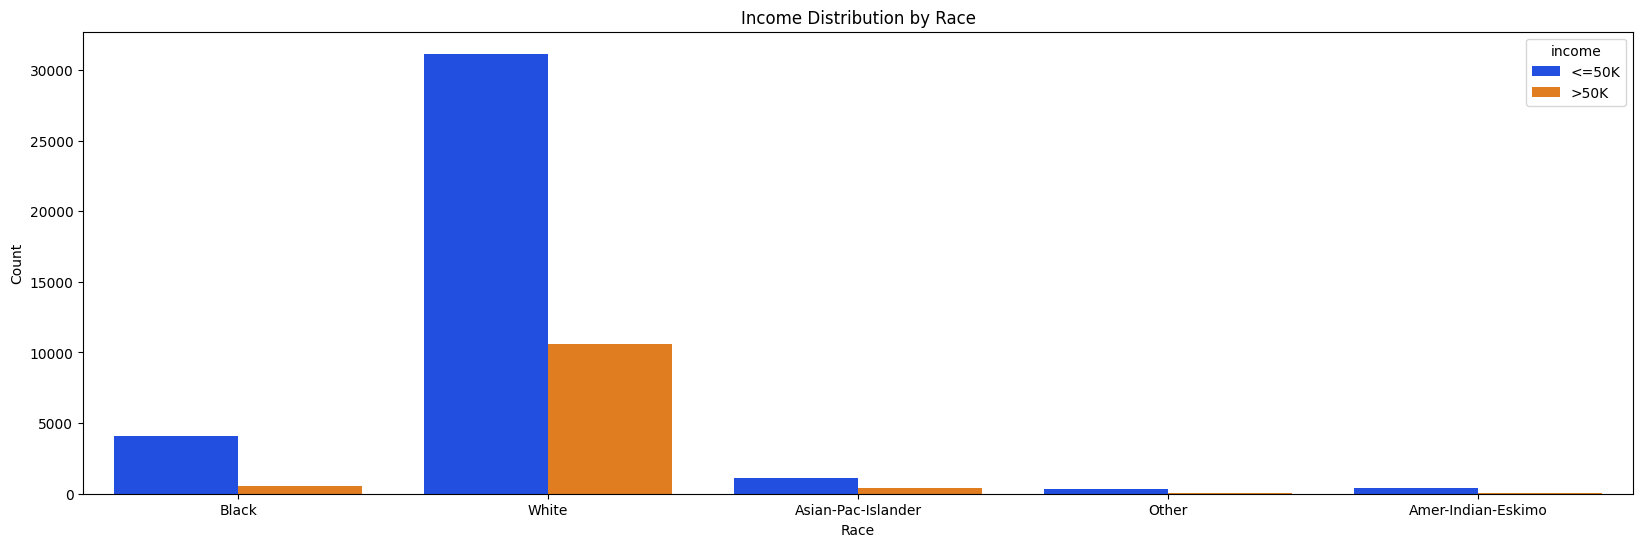

In [16]:
# Creating a countplot of income across race
plt.figure(figsize=(20, 6))
sns.countplot(x='race', hue='income', data=df, palette='bright')
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')


White people are highest paying employees , they are in greater number in both in come more than 50 K and less than 50 K

Text(0, 0.5, 'Count')

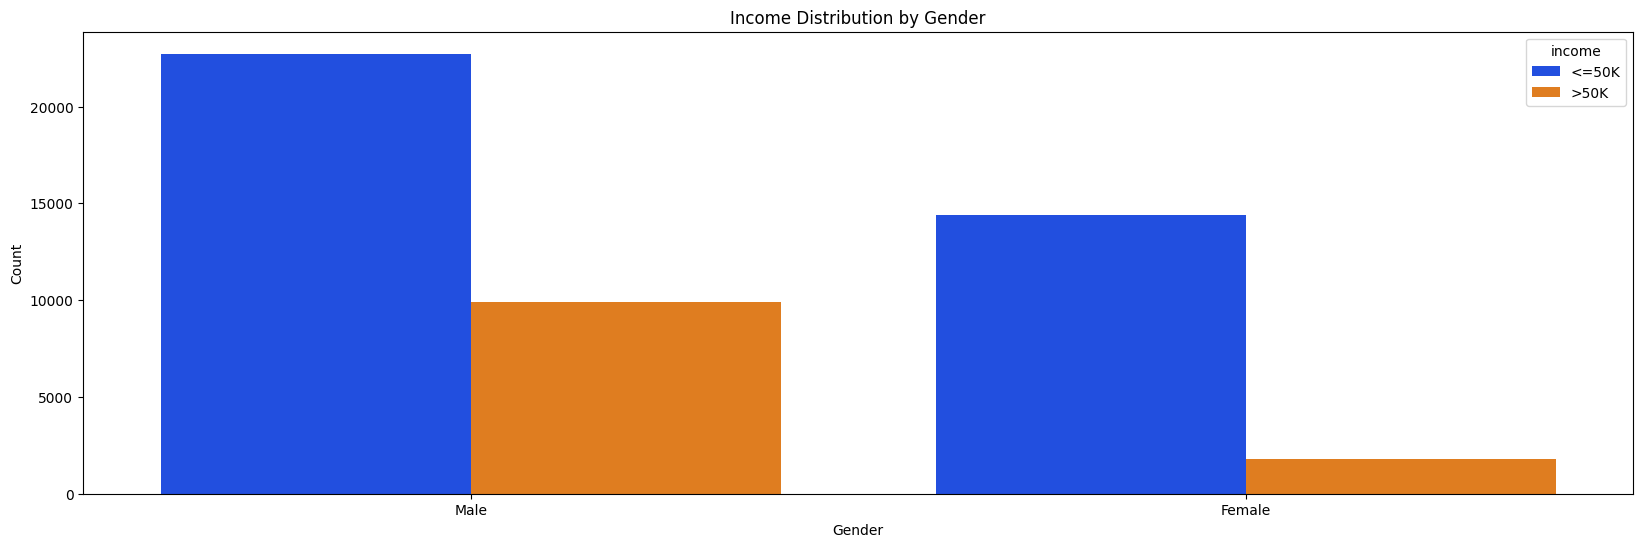

In [17]:
# Creating a countplot of income across sex

plt.figure(figsize=(20, 6))
sns.countplot(x='gender', hue='income', data=df, palette='bright')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

males earn more than females in both perspective either greater than 50K or less than 50 K there count are higher

### Multivariate Analysis

In [18]:
# first encode income column
df['income']=df['income'].map({'<=50K':0,'>50K':1})

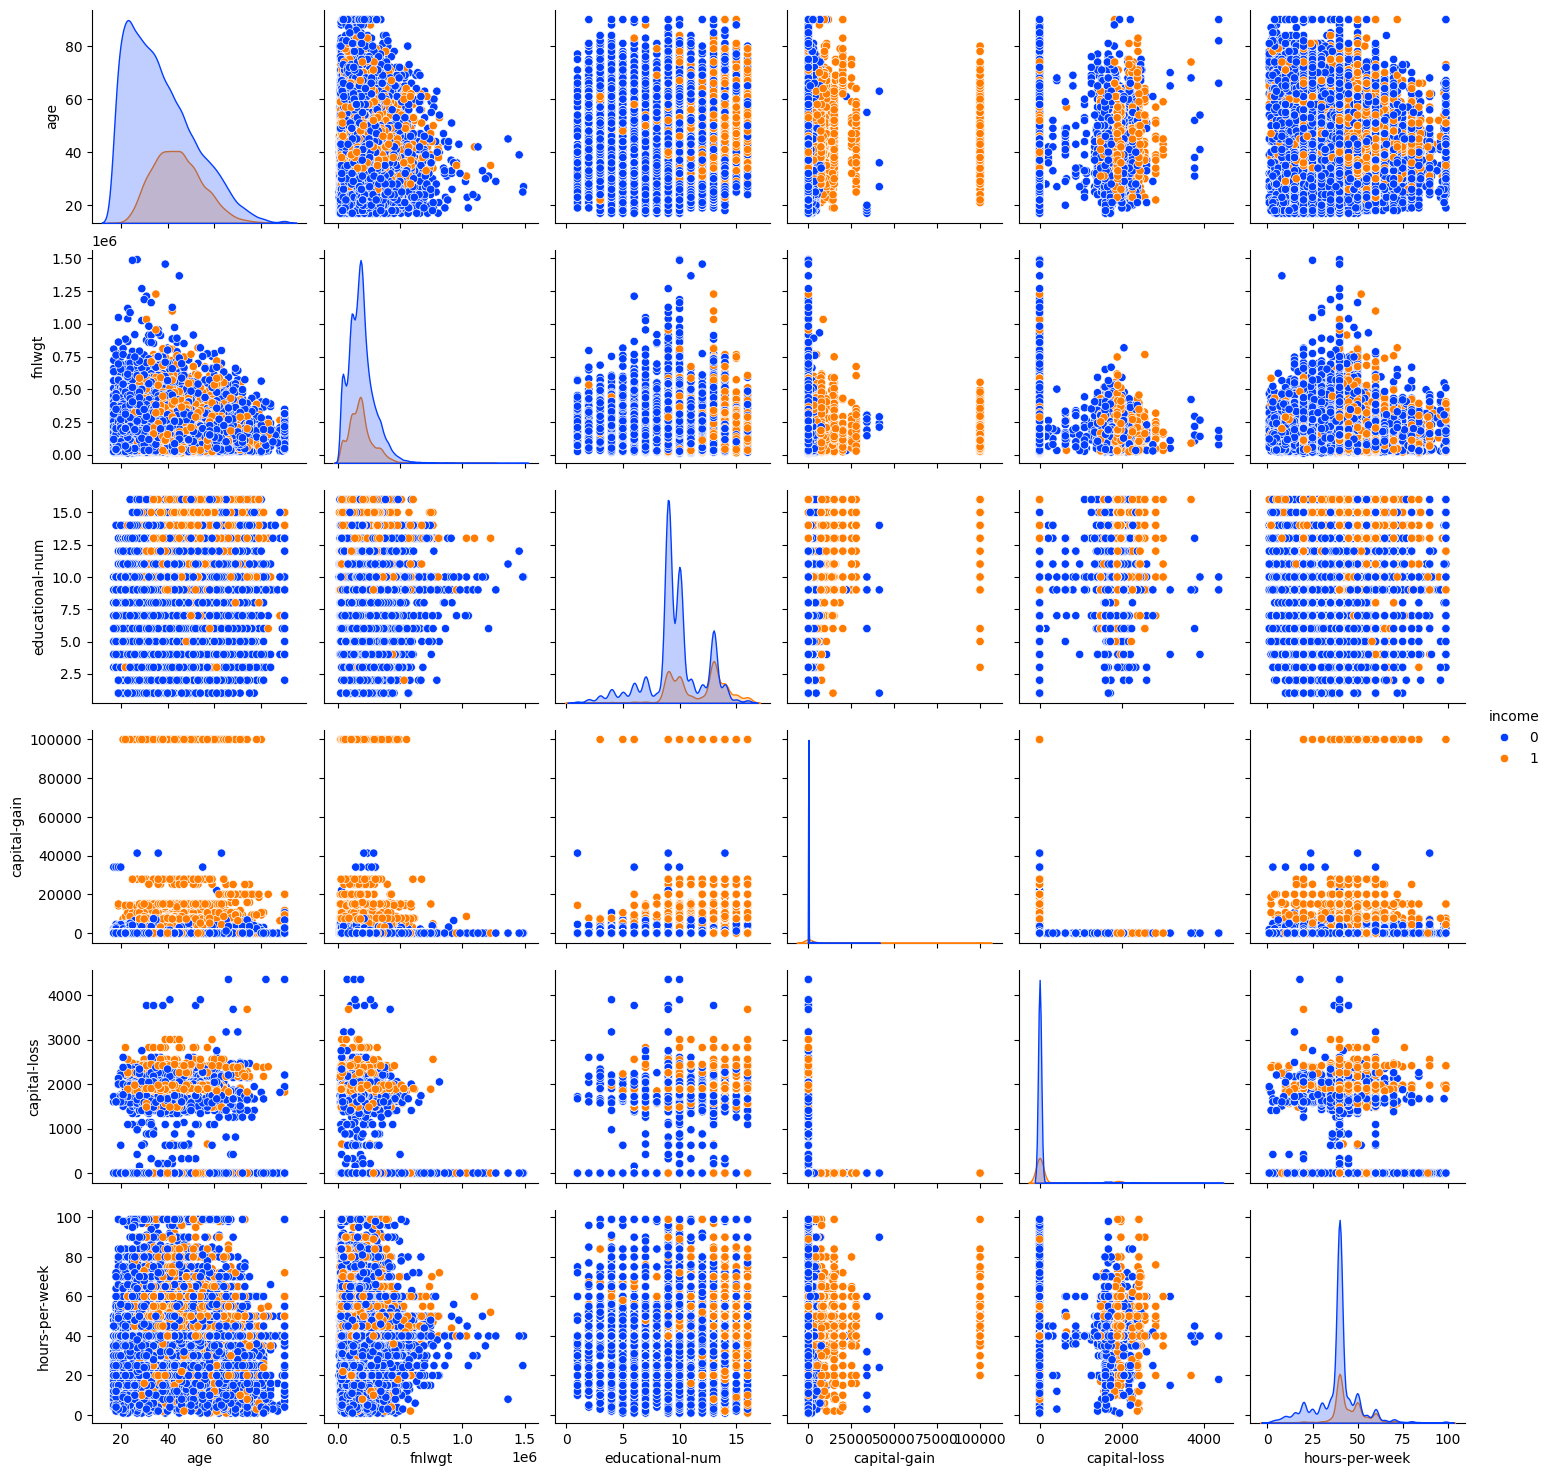

In [19]:
# Creating a pairplot of dataset
sns.pairplot(df, hue='income', palette='bright')
plt.show()

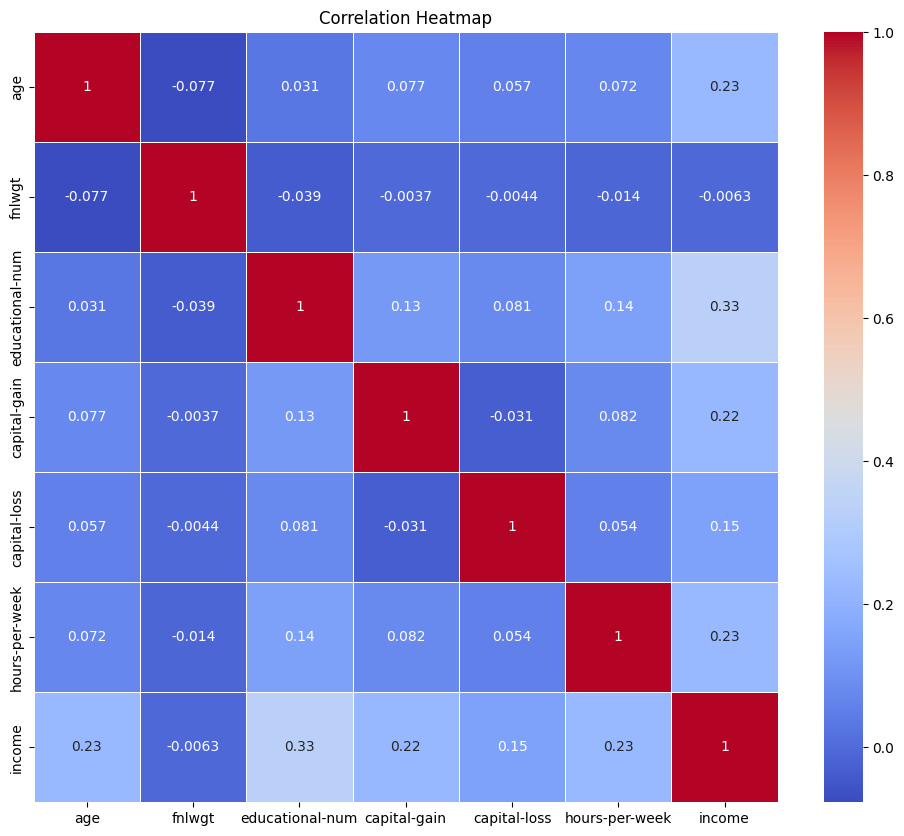

In [20]:
# Checking correlation bwtween variables
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()






*   as we can see from the plot that the numeric variables has negative to weak positive correlation , so they are not highly correlated with each other we can't surely say just by watching this graph that if a person is old then he he will be paid more than 50 K $

*  From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.



## Data Cleaning

### *Missing Value*

In [21]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [22]:
!pip install skimpy
from skimpy import skim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.29.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatib

In [23]:
# think of skim  a quick way to get the "big picture" of your data
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 48842  │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 15     │ │ int64       │ 7     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column            ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ age               │   0 │     0 │   38.64 │   13.71 │     17 │     28 │     37 │     48 │      90 │ ██▆▃▁  │  │
│ │ fnlwgt            │   0 │     0 │  189700 │  105600 │  12280 │ 117600 │ 178100 │ 237600 │ 1490000 │   █▂   │  │
│ │ educational-num   │   0 │     0 │   10.08 │   2.571 │      1 │      9 │     10 │     12 │      16 │  ▁▁█▄▁ │  │
│ │ capital-gain      │   0 │     0 │    1079 │    7452 │      0 │      0 │      0 │      0 │  100000 │   █    │  │
│ │ capital-loss      │   0 │     0 │    87.5 │     403 │      0 │      0 │      0 │      0 │    4356 │   █    │  │
│ │ hours-per-week    │   0 │     0 │   40.42 │   12.39 │      1 │     40 │     40 │     45 │      99 │  ▁▂█▂  │  │
│ │ income            │   0 │     0 │  0.2393 │  0.4266 │      0 │      0 │      0 │      0 │       1 │ █    ▃ │  │
│ └───────────────────┴─────┴───────┴─────────┴─────────┴────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃          ┃           ┃           ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest ┃ longest   ┃ min       ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ workclass │  0 │    0 │ ?        │ Self-emp- │ ?         │ Without-p │       7.87 │         1 │      48842 │  │
│ │           │    │      │          │ not-inc   │           │ ay        │            │           │            │  │
│ │ education │  0 │    0 │ 9th      │ Some-coll │ 10th      │ Some-coll │       8.42 │         1 │      48842 │  │
│ │           │    │      │          │ ege       │           │ ege       │            │           │            │  │
│ │ marital-s │  0 │    0 │ Widowed  │ Married-s │ Divorced  │ Widowed   │       14.4 │         1 │      48842 │  │
│ │ tatus     │    │      │          │ pouse-abs │           │           │            │           │            │  │
│ │           │    │      │          │ ent       │           │           │            │           │            │  │
│ │ occupatio │  0 │    0 │ ?        │ Machine-o │ ?         │ Transport │       12.2 │         1 │      48842 │  │
│ │ n         │    │      │          │ p-inspct  │           │ -moving   │            │           │            │  │
│ │ relations │  0 │    0 │ Wife     │ Other-rel │ Husba

**Observations:**




*   The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.

*   The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.



In [24]:
cols_with_question_marks = []
for i in df.columns:
    if (df[i] == '?').any():
        cols_with_question_marks.append(i)

print("Columns with '?' values:", cols_with_question_marks)

Columns with '?' values: ['workclass', 'occupation', 'native-country']


In [25]:
# Replace '?' with NaN for better handling
for column in ['workclass', 'occupation', 'native-country']:
    df[column] = df[column].replace('?', np.nan)

In [26]:
df.isnull().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


### **Knn Imputer**



now lets fill na value with knn impute and the second iteration fill with most frequent

In [27]:
# we need to transform these string col to numerical to use KNNImputer that use distanse
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to categorical columns
for column in ['workclass', 'occupation', 'native-country']:
    df[column] = encoder.fit_transform(df[column].astype(str))

# Now, you can use the KNNImputer on the encoded columns
imputer = KNNImputer(n_neighbors=10)
df[['workclass', 'occupation', 'native-country']] = imputer.fit_transform(df[['workclass', 'occupation', 'native-country']])


In [28]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3.0,226802,11th,7,Never-married,6.0,Own-child,Black,Male,0,0,40,38.0,0
1,38,3.0,89814,HS-grad,9,Married-civ-spouse,4.0,Husband,White,Male,0,0,50,38.0,0
2,28,1.0,336951,Assoc-acdm,12,Married-civ-spouse,10.0,Husband,White,Male,0,0,40,38.0,1
3,44,3.0,160323,Some-college,10,Married-civ-spouse,6.0,Husband,Black,Male,7688,0,40,38.0,1
4,18,8.0,103497,Some-college,10,Never-married,14.0,Own-child,White,Female,0,0,30,38.0,0
5,34,3.0,198693,10th,6,Never-married,7.0,Not-in-family,White,Male,0,0,30,38.0,0
6,29,8.0,227026,HS-grad,9,Never-married,14.0,Unmarried,Black,Male,0,0,40,38.0,0
7,63,5.0,104626,Prof-school,15,Married-civ-spouse,9.0,Husband,White,Male,3103,0,32,38.0,1
8,24,3.0,369667,Some-college,10,Never-married,7.0,Unmarried,White,Female,0,0,40,38.0,0
9,55,3.0,104996,7th-8th,4,Married-civ-spouse,2.0,Husband,White,Male,0,0,10,38.0,0


In [29]:
# check if there are any miss value
cols_with_question_marks = []
for i in df.columns:
    if (df[i] == '?').any():
        cols_with_question_marks.append(i)

print("Columns with '?' values:", cols_with_question_marks)

Columns with '?' values: []


### **Dublicte Data**

In [30]:
df.drop_duplicates(inplace=True)
df.shape

(48790, 15)

In [31]:
df.nunique()

,0
age,74
workclass,9
fnlwgt,28523
education,16
educational-num,16
marital-status,7
occupation,15
relationship,6
race,5
gender,2


## Checking Numeric Columns


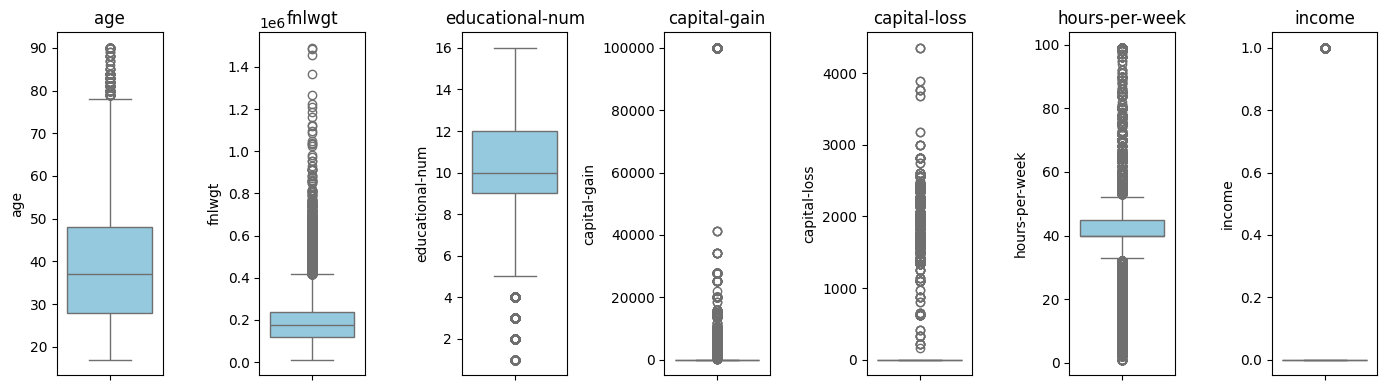

In [32]:
# Checking Outliers in Individual Features
x = 0
#Numerical features;
numeric_columns = df.select_dtypes(include=['number']).columns

# Create a figure with specified size
plt.figure(figsize=(16, 4))

for col in numeric_columns:
  if col not in ['workclass', 'occupation', 'native-country']:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()



### "hours_per_week" Column

<ipython-input-33-be719d485713>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["hours-per-week"], kde = True)


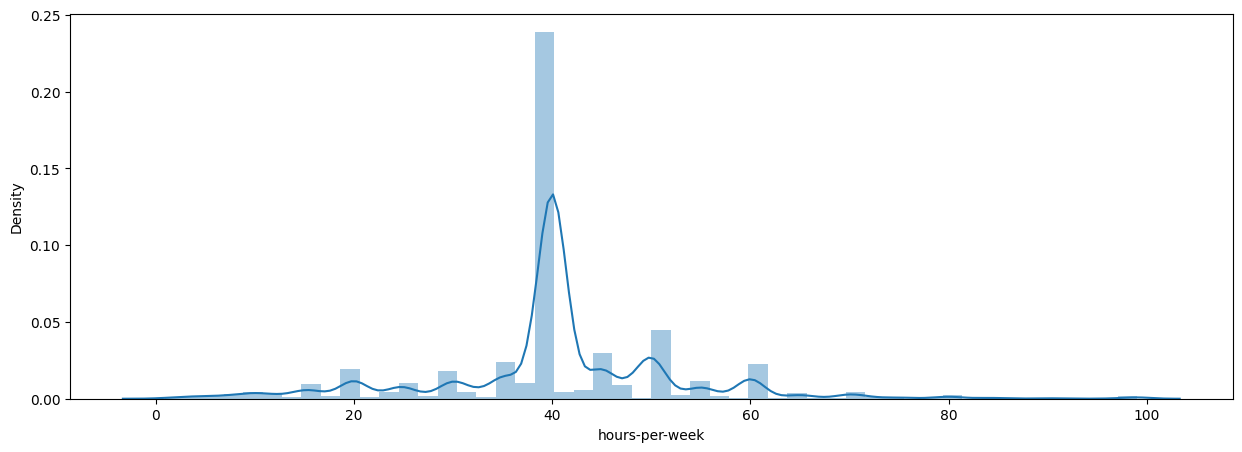

____________________________________________________________________________________________________
skewness in age column : 0.2396517078988374


In [33]:
plt.figure(figsize = (15,5))
sns.distplot(df["hours-per-week"], kde = True)

plt.show()
print("_"*100)
print("skewness in age column :",df["hours-per-week"].skew());

In [34]:
# usning   ~ (NOT Operator)
df = df[~((df["hours-per-week"] > 72) | (df["hours-per-week"] < 20))]

### "capital_gain" & "capital_loss" Columns

In [35]:
 df.describe()

,age,workclass,fnlwgt,educational-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,income
count,45537.000000,45537.000000,4.553700e+04,45537.000000,45537.000000,45537.000000,45537.000000,45537.000000,45537.000000,45537.000000
mean,38.588818,3.326218,1.903103e+05,10.116059,6.329886,1100.436788,89.253420,41.406922,36.466302,0.247337
std,13.134234,1.531648,1.056947e+05,2.556948,4.297082,7508.496922,406.462019,9.223390,6.089024,0.431469
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178330e+05,9.000000,3.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.788410e+05,10.000000,6.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,2.380020e+05,13.000000,10.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,8.000000,1.490400e+06,16.000000,14.000000,99999.000000,4356.000000,72.000000,41.000000,1.000000


In [36]:
df['capital_diff'] = df['capital-gain'] - df['capital-loss']


In [37]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,capital_diff
0,25,3.0,226802,11th,7,Never-married,6.0,Own-child,Black,Male,0,0,40,38.0,0,0
1,38,3.0,89814,HS-grad,9,Married-civ-spouse,4.0,Husband,White,Male,0,0,50,38.0,0,0
2,28,1.0,336951,Assoc-acdm,12,Married-civ-spouse,10.0,Husband,White,Male,0,0,40,38.0,1,0
3,44,3.0,160323,Some-college,10,Married-civ-spouse,6.0,Husband,Black,Male,7688,0,40,38.0,1,7688
4,18,8.0,103497,Some-college,10,Never-married,14.0,Own-child,White,Female,0,0,30,38.0,0,0


In [38]:
df['capital_diff'] = pd.cut(df['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
df['capital_diff'] = df['capital_diff'].astype('object')
df.drop(['capital-gain'], axis = 1, inplace = True)
df.drop(['capital-loss'], axis = 1, inplace = True)

In [39]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital_diff
0,25,3.0,226802,11th,7,Never-married,6.0,Own-child,Black,Male,40,38.0,0,Low
1,38,3.0,89814,HS-grad,9,Married-civ-spouse,4.0,Husband,White,Male,50,38.0,0,Low
2,28,1.0,336951,Assoc-acdm,12,Married-civ-spouse,10.0,Husband,White,Male,40,38.0,1,Low
3,44,3.0,160323,Some-college,10,Married-civ-spouse,6.0,Husband,Black,Male,40,38.0,1,High
4,18,8.0,103497,Some-college,10,Never-married,14.0,Own-child,White,Female,30,38.0,0,Low


### "fnlwgt" Column


In [40]:
df.drop(['fnlwgt'], axis = 1, inplace = True)

## Encoding categorical Feature

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45537 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45537 non-null  int64  
 1   workclass        45537 non-null  float64
 2   education        45537 non-null  object 
 3   educational-num  45537 non-null  int64  
 4   marital-status   45537 non-null  object 
 5   occupation       45537 non-null  float64
 6   relationship     45537 non-null  object 
 7   race             45537 non-null  object 
 8   gender           45537 non-null  object 
 9   hours-per-week   45537 non-null  int64  
 10  native-country   45537 non-null  float64
 11  income           45537 non-null  int64  
 12  capital_diff     45537 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 4.9+ MB


In [42]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])


In [43]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital_diff
0,25,3.0,1,7,4,6.0,3,2,1,40,38.0,0,1
1,38,3.0,11,9,2,4.0,0,4,1,50,38.0,0,1
2,28,1.0,7,12,2,10.0,0,4,1,40,38.0,1,1
3,44,3.0,15,10,2,6.0,0,2,1,40,38.0,1,0
4,18,8.0,15,10,4,14.0,3,4,0,30,38.0,0,1


## Feature Scaling

In [44]:
df.shape

(45537, 13)

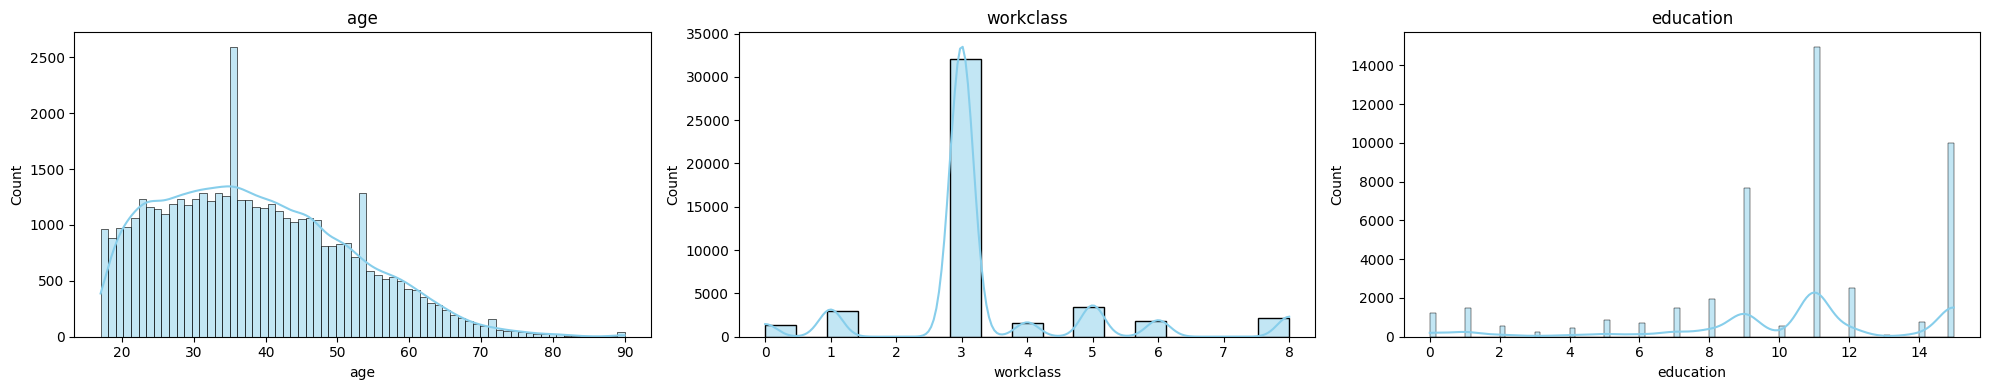

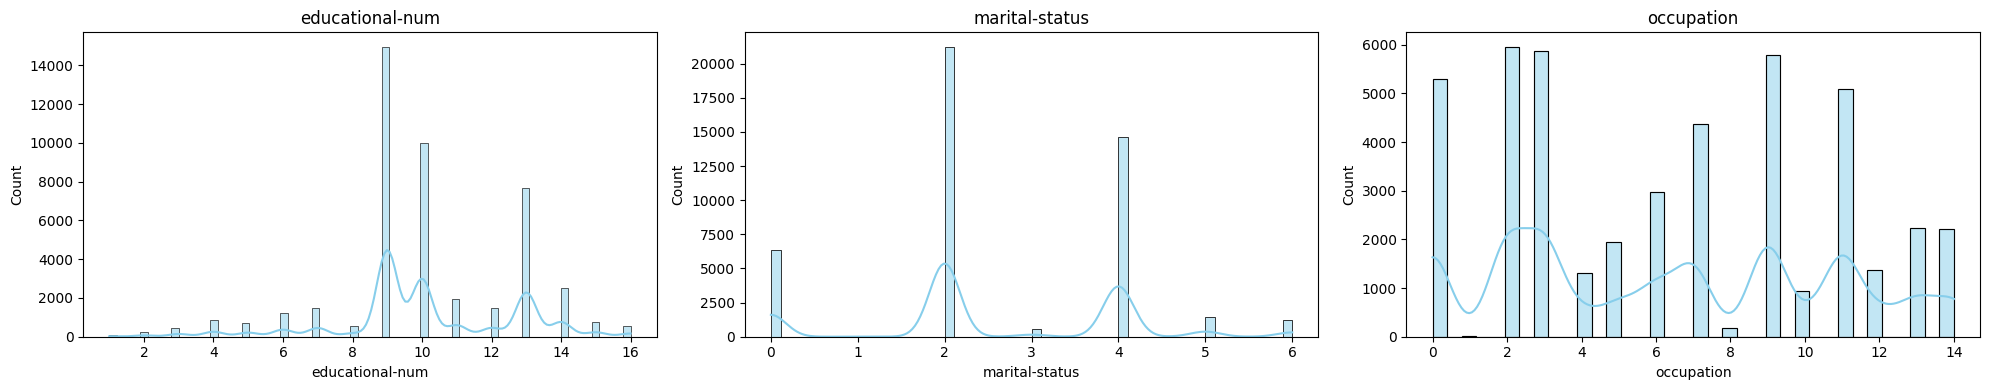

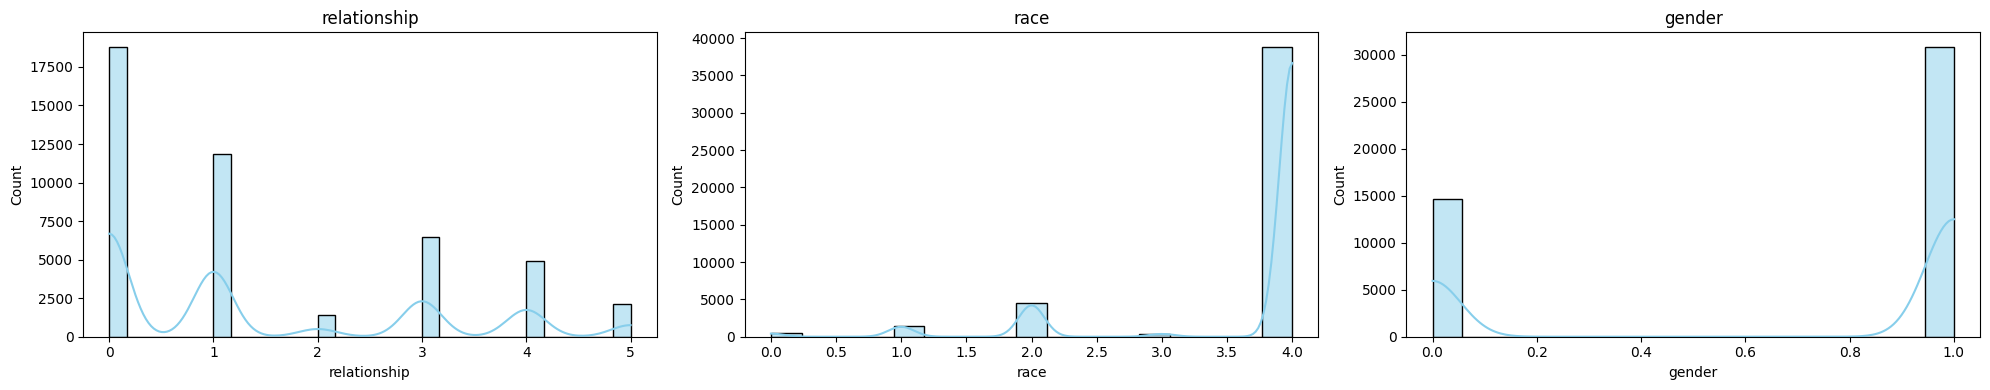

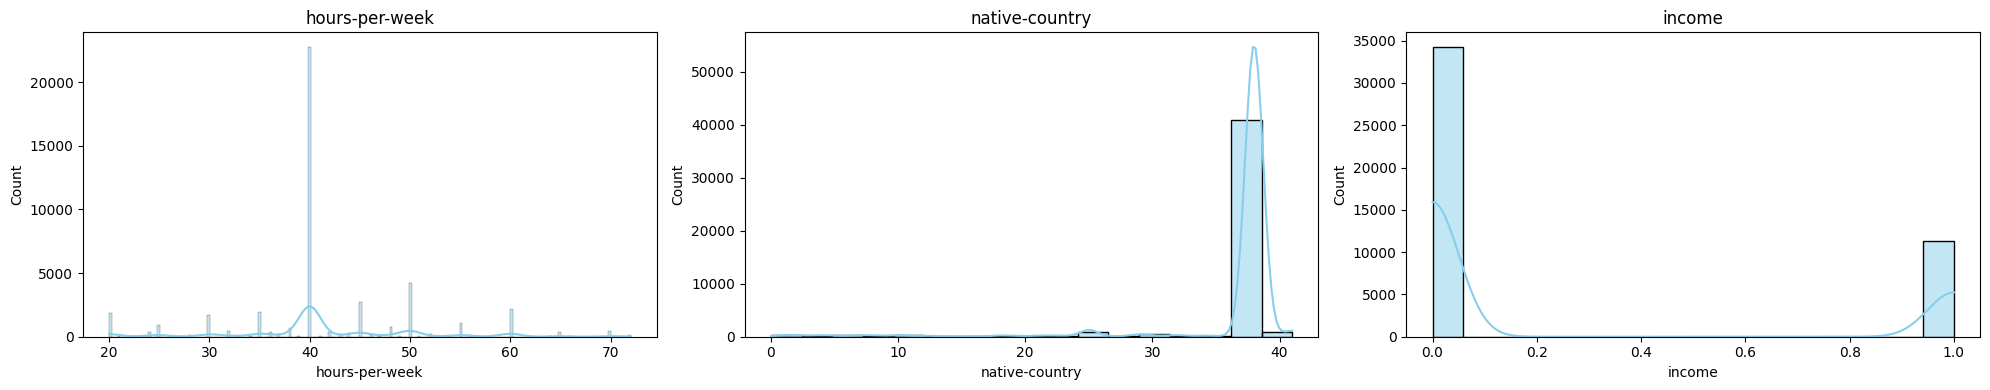

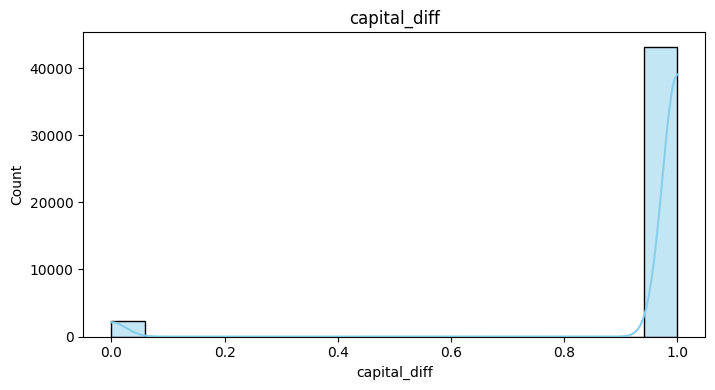

In [45]:
# Checking distribution in Individual Features
x = 0

num_cols = min(len(df.columns), 3)

plt.figure(figsize=(20, 4))

for col in df.columns:
    x += 1
    if x > num_cols:
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(20, 4))
        x = 1  # Reset to 1 for the new figure

    plt.subplot(1, num_cols, x)  # Use num_cols here
    sns.histplot(df[col], color='skyblue', kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [46]:
# Apply StandardScaler only to numerical columns
for col in df.columns:
    if col not in ['income']:
      scaler = StandardScaler()
      df[col] = scaler.fit_transform(df[[col]])

In [47]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital_diff
0,-1.034622,-0.212987,-2.466441,-1.218677,0.946174,-0.076771,0.994806,-1.958837,0.689499,-0.152540,0.251882,0,0.233792
1,-0.044831,-0.212987,0.175285,-0.436486,-0.387632,-0.542208,-0.882415,0.395770,0.689499,0.931672,0.251882,0,0.233792
2,-0.806209,-1.518785,-0.881405,0.736801,-0.387632,0.854104,-0.882415,0.395770,0.689499,-0.152540,0.251882,1,0.233792
3,0.411995,-0.212987,1.231976,-0.045390,-0.387632,-0.076771,-0.882415,-1.958837,0.689499,-0.152540,0.251882,1,-4.277305
4,-1.567586,3.051505,1.231976,-0.045390,0.946174,1.784978,0.994806,0.395770,-1.450329,-1.236752,0.251882,0,0.233792


## Feature Selection

In [48]:
X = df.drop('income', axis=1)
y= df['income']

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [50]:
selector.fit(X, y)

ExtraTreesClassifier(random_state=42)

In [51]:
ExtraTreesClassifier(random_state=42)

ExtraTreesClassifier(random_state=42)

In [52]:
feature_imp = selector.feature_importances_


In [53]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))


0 24.17
1 5.24
2 3.71
3 9.5
4 8.44
5 9.44
6 9.73
7 1.69
8 2.94
9 11.56
10 2.55
11 11.02


In [54]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 45537 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45537 non-null  float64
 1   workclass        45537 non-null  float64
 2   education        45537 non-null  float64
 3   educational-num  45537 non-null  float64
 4   marital-status   45537 non-null  float64
 5   occupation       45537 non-null  float64
 6   relationship     45537 non-null  float64
 7   race             45537 non-null  float64
 8   gender           45537 non-null  float64
 9   hours-per-week   45537 non-null  float64
 10  native-country   45537 non-null  float64
 11  capital_diff     45537 non-null  float64
dtypes: float64(12)
memory usage: 4.5 MB


In [55]:
X = X.drop([ 'education', 'race',
   'native-country'], axis=1)


In [56]:
X.head()

,age,workclass,educational-num,marital-status,occupation,relationship,gender,hours-per-week,capital_diff
0,-1.034622,-0.212987,-1.218677,0.946174,-0.076771,0.994806,0.689499,-0.152540,0.233792
1,-0.044831,-0.212987,-0.436486,-0.387632,-0.542208,-0.882415,0.689499,0.931672,0.233792
2,-0.806209,-1.518785,0.736801,-0.387632,0.854104,-0.882415,0.689499,-0.152540,0.233792
3,0.411995,-0.212987,-0.045390,-0.387632,-0.076771,-0.882415,0.689499,-0.152540,-4.277305
4,-1.567586,3.051505,-0.045390,0.946174,1.784978,0.994806,-1.450329,-1.236752,0.233792


## Handle Unbalance Class




<Axes: xlabel='income'>

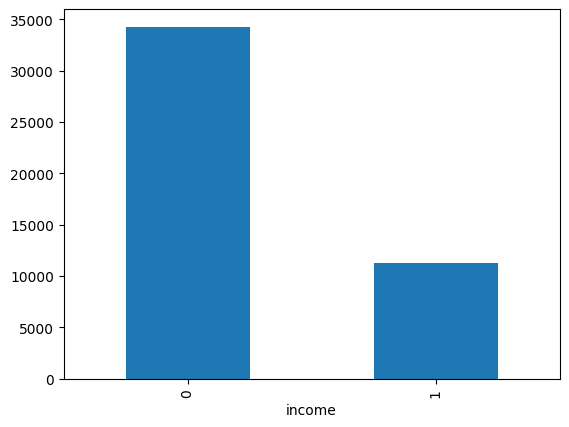

In [57]:
df['income'].value_counts().plot(kind='bar')


we need to  make oversample

<Axes: title={'center': 'Class Distribution After SMOTE'}, xlabel='income'>

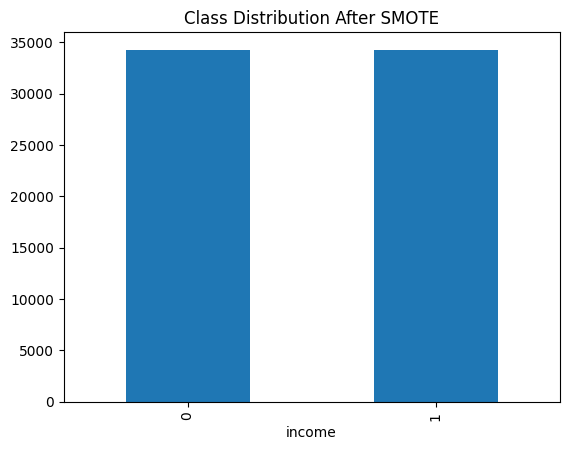

In [58]:

## we need to make oversample
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE

# Apply SMOTE
SMOTE_over = SMOTE(random_state=42)
X_res, y_res = SMOTE_over.fit_resample(X, y)

# Recombine into a new DataFrame
df_res = pd.concat([X_res, y_res], axis=1)

# Now check the class distribution
df_res['income'].value_counts().plot(kind='bar', title='Class Distribution After SMOTE')

In [59]:
df_res.head()

,age,workclass,educational-num,marital-status,occupation,relationship,gender,hours-per-week,capital_diff,income
0,-1.034622,-0.212987,-1.218677,0.946174,-0.076771,0.994806,0.689499,-0.152540,0.233792,0
1,-0.044831,-0.212987,-0.436486,-0.387632,-0.542208,-0.882415,0.689499,0.931672,0.233792,0
2,-0.806209,-1.518785,0.736801,-0.387632,0.854104,-0.882415,0.689499,-0.152540,0.233792,1
3,0.411995,-0.212987,-0.045390,-0.387632,-0.076771,-0.882415,0.689499,-0.152540,-4.277305,1
4,-1.567586,3.051505,-0.045390,0.946174,1.784978,0.994806,-1.450329,-1.236752,0.233792,0


In [60]:
X=df_res.drop(columns=['income'])
y=df_res['income']

## Bulid Model

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [62]:
models ={
    "Logistic Regression":LogisticRegression( ),
    "support vector machine for":SVC(),
    "naive bayes":GaussianNB(),
    "Decision Tree":DecisionTreeClassifier(criterion='gini',max_depth=15),
     "Random Forest":RandomForestClassifier(criterion='gini',n_estimators=100,max_depth=15),
     "KNeighborsClassifier":KNeighborsClassifier(n_neighbors=10),
     "XG Boost":XGBClassifier(),
     "Ada Boost":AdaBoostClassifier(),
     "Gradient Boost":GradientBoostingClassifier(),
     "Bagging Classifier":BaggingClassifier(),
     "Extra Trees Classifier":ExtraTreesClassifier(),


}


In [63]:
accuracy=[]
for model_name , model in models.items():
    model.fit(X_train,y_train)
    acc_Train = accuracy_score(y_train,model.predict(X_train).round(),)
    acc_Test  =  accuracy_score(y_test,model.predict(X_test).round())

    pre_Train = precision_score(y_train,model.predict(X_train).round(), average='weighted')
    pre_Test  =  precision_score(y_test,model.predict(X_test).round(), average='weighted')

    rec_Train = recall_score(y_train,model.predict(X_train).round(), average='weighted')
    rec_Test  =  recall_score(y_test,model.predict(X_test).round(), average='weighted')

    f1_Train = f1_score(y_train,model.predict(X_train).round(), average='weighted')
    f1_Test  =  f1_score(y_test,model.predict(X_test).round(), average='weighted')

    accuracy.append([acc_Train,acc_Test,pre_Train,pre_Test,rec_Train,rec_Test,f1_Train,f1_Test])

In [64]:
pd.DataFrame(accuracy,columns=["acc_Train","acc_Test","pre_Train","pre_Test","rec_Train","rec_Test","f1_Train","f1_Test"],index=models.keys())

,acc_Train,acc_Test,pre_Train,pre_Test,rec_Train,rec_Test,f1_Train,f1_Test
Logistic Regression,0.764050,0.762947,0.764057,0.762947,0.764050,0.762947,0.764049,0.762947
support vector machine for,0.823936,0.820423,0.829199,0.826564,0.823936,0.820423,0.823229,0.819575
naive bayes,0.778365,0.780088,0.787456,0.788927,0.778365,0.780088,0.776599,0.778393
Decision Tree,0.891644,0.852443,0.892530,0.853208,0.891644,0.852443,0.891583,0.852364
Random Forest,0.900379,0.866885,0.904475,0.870608,0.900379,0.866885,0.900126,0.866550
KNeighborsClassifier,0.865203,0.842013,0.866798,0.843467,0.865203,0.842013,0.865056,0.841846
XG Boost,0.895292,0.881619,0.895630,0.881988,0.895292,0.881619,0.895269,0.881591
Ada Boost,0.825413,0.824945,0.826117,0.825465,0.825413,0.824945,0.825319,0.824875
Gradient Boost,0.850760,0.848651,0.852285,0.850166,0.850760,0.848651,0.850599,0.848487
Bagging Classifier,0.961067,0.867688,0.961079,0.867706,0.961067,0.867688,0.961067,0.867686


print Classification report for every model


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6855
           1       0.76      0.76      0.76      6855

    accuracy                           0.76     13710
   macro avg       0.76      0.76      0.76     13710
weighted avg       0.76      0.76      0.76     13710

--------------------------------------------------------
Confusion Matrix for Logistic Regression:


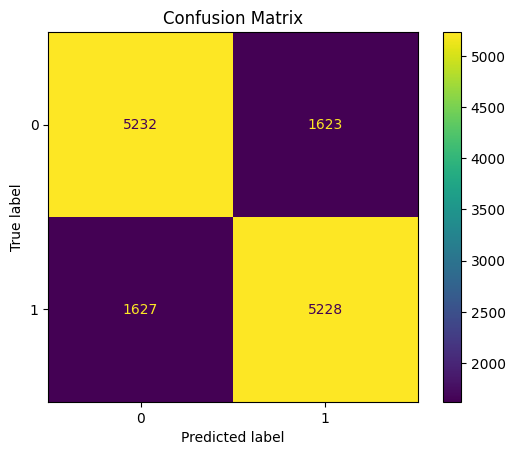


Classification Report for support vector machine for:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      6855
           1       0.78      0.89      0.83      6855

    accuracy                           0.82     13710
   macro avg       0.83      0.82      0.82     13710
weighted avg       0.83      0.82      0.82     13710

--------------------------------------------------------
Confusion Matrix for support vector machine for:


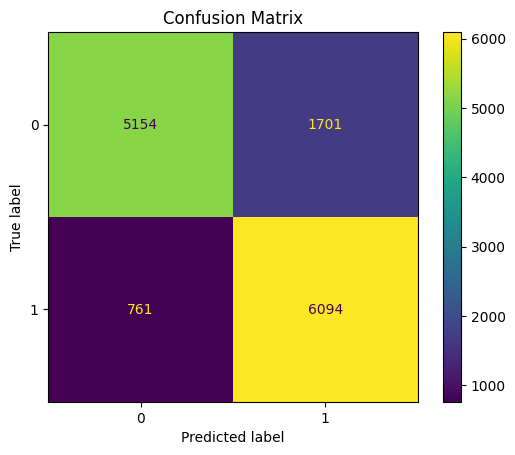


Classification Report for naive bayes:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      6855
           1       0.84      0.69      0.76      6855

    accuracy                           0.78     13710
   macro avg       0.79      0.78      0.78     13710
weighted avg       0.79      0.78      0.78     13710

--------------------------------------------------------
Confusion Matrix for naive bayes:


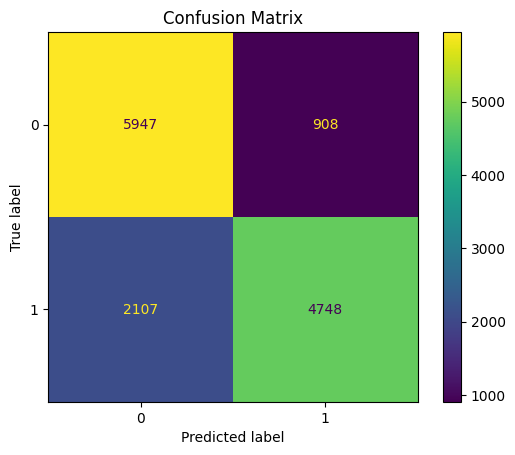


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6855
           1       0.84      0.88      0.86      6855

    accuracy                           0.85     13710
   macro avg       0.85      0.85      0.85     13710
weighted avg       0.85      0.85      0.85     13710

--------------------------------------------------------
Confusion Matrix for Decision Tree:


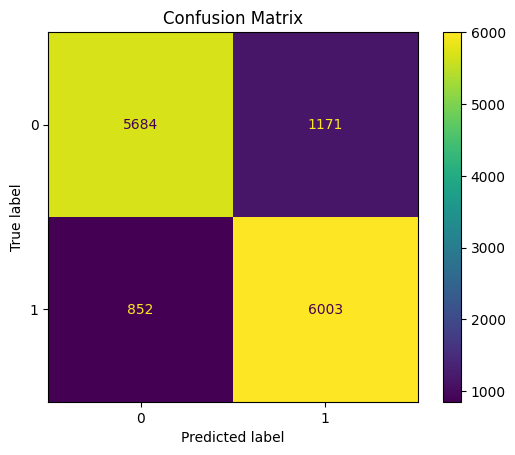


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      6855
           1       0.83      0.92      0.87      6855

    accuracy                           0.87     13710
   macro avg       0.87      0.87      0.87     13710
weighted avg       0.87      0.87      0.87     13710

--------------------------------------------------------
Confusion Matrix for Random Forest:


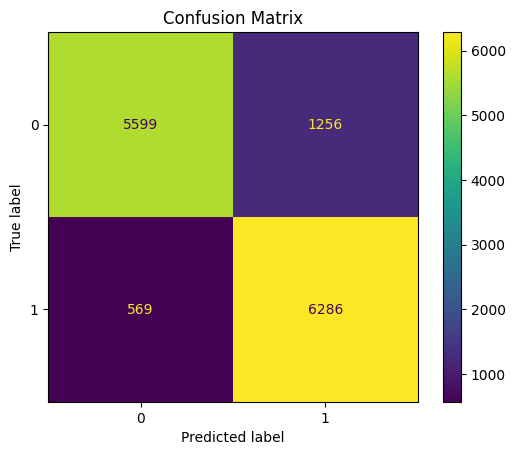


Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      6855
           1       0.82      0.87      0.85      6855

    accuracy                           0.84     13710
   macro avg       0.84      0.84      0.84     13710
weighted avg       0.84      0.84      0.84     13710

--------------------------------------------------------
Confusion Matrix for KNeighborsClassifier:


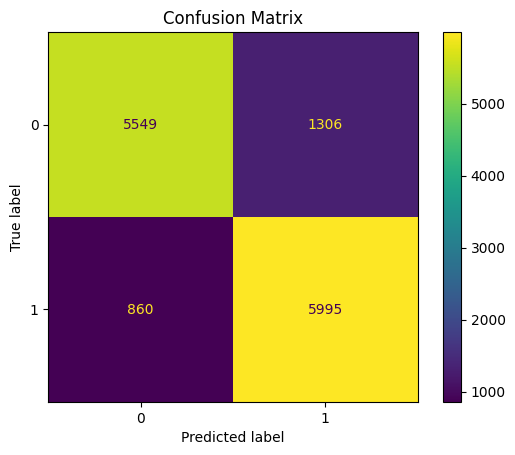


Classification Report for XG Boost:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6855
           1       0.87      0.90      0.88      6855

    accuracy                           0.88     13710
   macro avg       0.88      0.88      0.88     13710
weighted avg       0.88      0.88      0.88     13710

--------------------------------------------------------
Confusion Matrix for XG Boost:


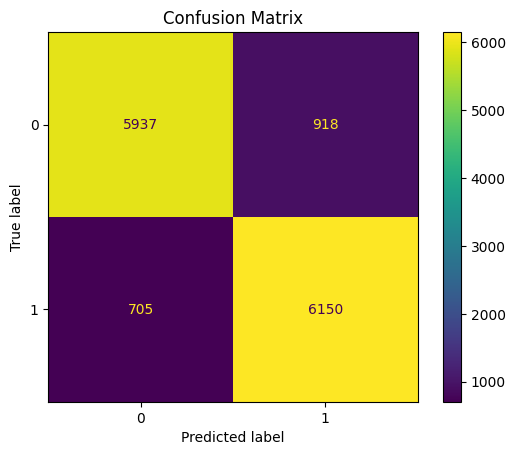


Classification Report for Ada Boost:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      6855
           1       0.81      0.84      0.83      6855

    accuracy                           0.82     13710
   macro avg       0.83      0.82      0.82     13710
weighted avg       0.83      0.82      0.82     13710

--------------------------------------------------------
Confusion Matrix for Ada Boost:


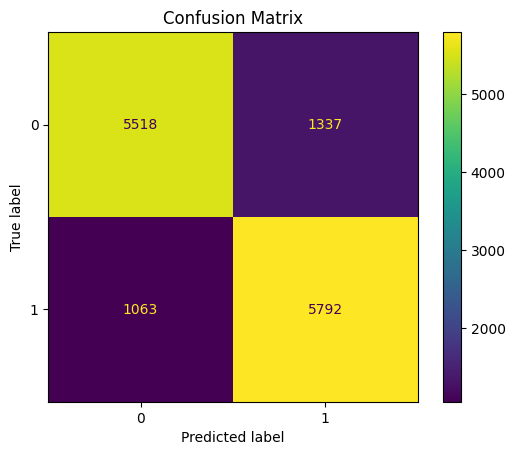


Classification Report for Gradient Boost:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      6855
           1       0.83      0.88      0.85      6855

    accuracy                           0.85     13710
   macro avg       0.85      0.85      0.85     13710
weighted avg       0.85      0.85      0.85     13710

--------------------------------------------------------
Confusion Matrix for Gradient Boost:


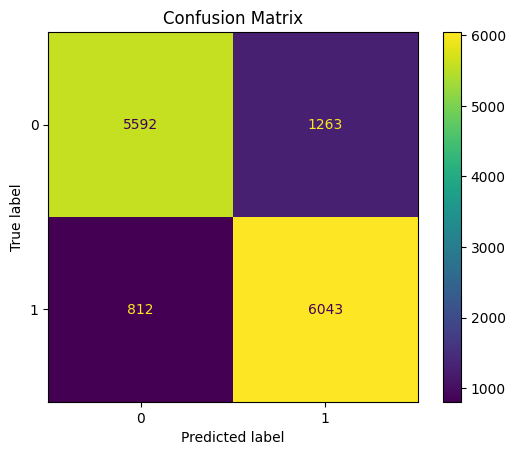


Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6855
           1       0.87      0.86      0.87      6855

    accuracy                           0.87     13710
   macro avg       0.87      0.87      0.87     13710
weighted avg       0.87      0.87      0.87     13710

--------------------------------------------------------
Confusion Matrix for Bagging Classifier:


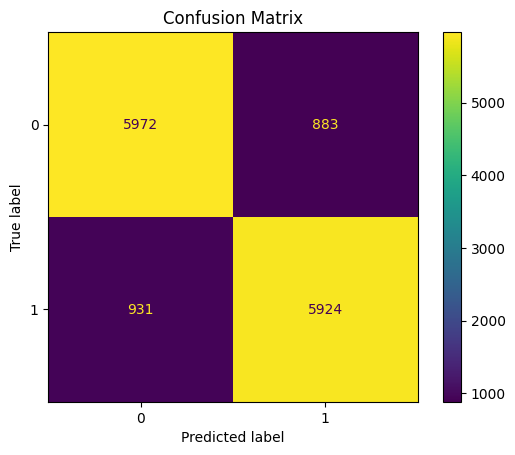


Classification Report for Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6855
           1       0.88      0.88      0.88      6855

    accuracy                           0.88     13710
   macro avg       0.88      0.88      0.88     13710
weighted avg       0.88      0.88      0.88     13710

--------------------------------------------------------
Confusion Matrix for Extra Trees Classifier:


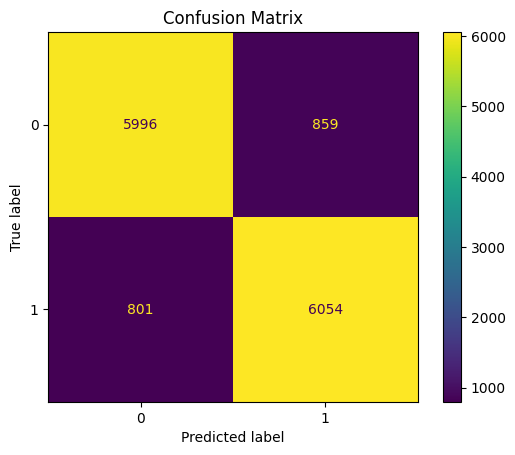

In [65]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\033[1m--------------------------------------------------------\033[0m")
    print(f"Confusion Matrix for {model_name}:")
    cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix
    # Create ConfusionMatrixDisplay with the calculated confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

## **Result Predictions**

In [66]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    # Create cross-checking DataFrame for the current model
    cross_checking = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    # Print the model name and display a sample of the DataFrame
    print(f"Cross-checking DataFrame for {model_name}:")
    print(cross_checking.sample(5))  # Display 5 random rows
    print("\033[1m--------------------------------------------------------\033[0m") # Add a separator for clarity

Cross-checking DataFrame for Logistic Regression:
       Actual  Predicted
18703       0          1
54332       1          1
62440       1          1
49320       1          1
43273       0          0
--------------------------------------------------------
Cross-checking DataFrame for support vector machine for:
       Actual  Predicted
67998       1          1
14118       1          1
8611        0          0
4361        0          0
55809       1          0
--------------------------------------------------------
Cross-checking DataFrame for naive bayes:
       Actual  Predicted
2173        0          0
23003       1          0
6731        0          1
19729       1          1
5238        0          0
--------------------------------------------------------
Cross-checking DataFrame for Decision Tree:
       Actual  Predicted
16880       0          0
2409        0          0
60522       1          1
34647       0          0
34386       1          1
------------------------------------

## **Plot ACC for all Models**

In [67]:

accuracy_df = pd.DataFrame(accuracy, columns=["acc_Train","acc_Test","pre_Train","pre_Test","rec_Train","rec_Test","f1_Train","f1_Test"], index=models.keys())
accuracy_df['Model'] = accuracy_df.index  # Add a new column 'Model' containing the model names

# Create the bar chart using Plotly Express
fig = px.bar(accuracy_df,
             y='acc_Test',  # Accuracy on the test set
             x='Model', # x-axis set to the new 'Model' column
             title='Model Accuracy Comparison',
             labels={'acc_Test': 'Test Accuracy', 'Model': 'Model'},
             color='Model') # Color bars by model

fig.update_layout(xaxis_title="Model", yaxis_title="Test Accuracy")
fig.show()

# **Take The Robust Model and Make Fine Tune**

In [68]:
from sklearn.model_selection import  GridSearchCV

In [70]:
# Define XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic',use_label_encoder=False, eval_metric='logloss')

In [71]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7,9,12,14,16],
    'learning_rate': [0.01, 0.1,0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

In [75]:
# Grid Search with 3-fold CV
grid = GridSearchCV(xgb, param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)


Fitting 3 folds for each of 336 candidates, totalling 1008 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[05:56:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9, 12, 14, 16],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [77]:
# Best parameters and accuracy
print("Best parameters:", grid.best_params_)
print("Best training accuracy:", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 200, 'subsample': 1.0}
Best training accuracy: 0.8828714008379493
Test Accuracy: 0.8857038657913932


**Why we choose XGBoost ?**


*   my dataset is mixed categorical and numerical features Even if i encode categorical data using label encoding or one-hot, XGBoost handles it well.

*   
Parameters like lambda and alpha help reduce overfitting:

*   It builds trees sequentially, focusing on correcting previous errors — great for datasets with class imbalance
*   XGBoost assumes that samples are independent from each other.



